# **XGBoost**

importing required libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setting max rows and max columns in pandas

In [6]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

Loading dataset

In [7]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Dropping unneccesary variables

In [8]:
dataset.drop(columns=['RowNumber','CustomerId','Surname','Gender'],inplace=True)
dataset.head(10)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,44,8,113755.78,2,1,0,149756.71,1
6,822,France,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,29,4,115046.74,4,1,0,119346.88,1
8,501,France,44,4,142051.07,2,0,1,74940.50,0
9,684,France,27,2,134603.88,1,1,1,71725.73,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


we have one object data type(categorical variable)i.e Geography and we dont have any missing values


Finding correlation between variables

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure       

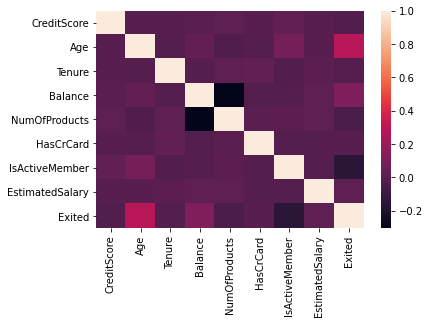

In [12]:
%matplotlib inline
print(dataset.corr())
sns.heatmap(dataset.corr())
plt.show()

From above all most all variables have no correlation between them

Enccoding categorical variable

In [14]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0


drop_first is used to prevent from dummy variable trap

Extracting dependent and independent variables

In [15]:
x=dataset.drop(columns='Exited').iloc[:,:].values
y=dataset['Exited'].iloc[:].values

Splitting Dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)


Feature Scaling

In [18]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Training XGBoost model

In [20]:
from xgboost import XGBClassifier
lr=XGBClassifier(random_state=0)
lr.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Predicting Test set results

In [21]:
y_pred=lr.predict(x_test)

Making confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1541   52]
 [ 229  178]]


Accuracy

In [23]:
accuracy_score(y_test,y_pred)

0.8595

Applying k-fold cross validation

In [27]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=lr,X=x_train,y=y_train,cv=10)
print('accuracy',accuracies.mean()*100)
print('standard deviation',accuracies.std()*100)

accuracy 86.35000000000002
standard deviation 0.604152298679731
